In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Read the data

In [306]:
df = pd.read_csv("./data/data.csv")
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,Andromeda,39,False,0,0,0,0,0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,Andromeda,24,False,109,9,25,549,44,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,Andromeda,58,True,43,3576,0,6715,49,Altark Susent,False
3,0003_02,Europa,False,A/0/S,Andromeda,33,False,0,1283,371,3329,193,Solam Susent,False
4,0004_01,Earth,False,F/1/S,Andromeda,16,False,303,70,151,565,2,Willy Santantines,True


#### Check the shape of data. It should be  (8693, 14)

In [307]:
print("Shape : ",df.shape)

Shape :  (8693, 14)


#### Apply describe on dataframe

In [308]:
print(df.describe())

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8693.000000   8693.000000   8693.000000   8693.000000   8693.000000   
mean     28.728517    220.009318    448.434027    169.572300    304.588865   
std      14.355438    660.519050   1595.790627    598.007164   1125.562559   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      20.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      37.000000     41.000000     61.000000     22.000000     53.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8693.000000  
mean     298.261820  
std     1134.126417  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       40.000000  
max    24133.000000  


#### Check if there any null value in the dataset.

In [309]:
df.isnull().sum()   #No null values in the dataset

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

#### Number of continuous and categorical features

In [310]:
continuous_features = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
categorical_features = ["PassengerId", "HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP", "Name", "Transported"]

#Categorical data needs to be encoded using any encoding methods to be used in various algorithms

print("Continuous Features : ",continuous_features, "\nNumber : ",len(continuous_features))
print("Categorical Features : ",categorical_features, "\nNumber : ",len(categorical_features))

Continuous Features :  ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'] 
Number :  6
Categorical Features :  ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name', 'Transported'] 
Number :  8


#### Unique values

In [311]:
#Print the number of unique values in each categorical feature

for feature in categorical_features:
    print(feature," : ", df[feature].unique(), "\nNumber : ",len(df[feature].unique()))
    print("\n")

PassengerId  :  ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02'] 
Number :  8693


HomePlanet  :  ['Europa' 'Earth' 'Mars'] 
Number :  3


CryoSleep  :  [False  True] 
Number :  2


Cabin  :  ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S'] 
Number :  6560


Destination  :  ['Andromeda' 'Cygnus' 'Virgo'] 
Number :  3


VIP  :  [False  True] 
Number :  2


Name  :  ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre'] 
Number :  8473


Transported  :  [False  True] 
Number :  2




#### Drop the features

In [312]:
#Dropping the features with more than 25 unique values for the sake of encoding

for feature in categorical_features:
    if(len(df[feature].unique()) > 25):
        df.drop(feature, axis = 1, inplace=True)

print("Shape : ",df.shape)

#We have dropped 3 columns

Shape :  (8693, 11)


#### One Hot Encoding

In [313]:
#Using one hot encoding on the other categorical columns

df = pd.get_dummies(df).astype(int) #Converting the bool values to int

df.head()



,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_Andromeda,Destination_Cygnus,Destination_Virgo
0,0,39,0,0,0,0,0,0,0,0,1,0,1,0,0
1,0,24,0,109,9,25,549,44,1,1,0,0,1,0,0
2,0,58,1,43,3576,0,6715,49,0,0,1,0,1,0,0
3,0,33,0,0,1283,371,3329,193,0,0,1,0,1,0,0
4,0,16,0,303,70,151,565,2,1,1,0,0,1,0,0


#### Split the data into train and test

In [314]:
# Given : Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

from sklearn.model_selection import train_test_split

X = df.drop("Transported",axis=1)
Y=df["Transported"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=1/3, random_state=42)

In [315]:
#Printing the shapes of the training and testing data:

print("Training Data X : ",X_train.shape)
print("Training Data Y : ",Y_train.shape)
print("Testing Data X : ",X_test.shape)
print("Testing Data Y : ",Y_test.shape)

Training Data X :  (5795, 14)
Training Data Y :  (5795,)
Testing Data X :  (2898, 14)
Testing Data Y :  (2898,)


#### Scale the data using Standard Scaler

Standard scaler normalizes the data. That is, all the data points will now have a mean of 0 and standard deviation of 1. This type of scaling is typically done when the data features have different units or when the magnitude of data varies throughout the dataset. This makes sure that no one feature gets more weightage compared to others because of the large value of its coeffiecients.

NOTE : Only the features are scaled and not the output

In [316]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X Train scaled : ")
print(X_train_scaled)
print("\n\n")
print("X Test scaled : ")
print(X_test_scaled)

X Train scaled : 
[[ 1.38542249 -0.25902916 -0.1544396  ... -1.52909569 -0.31727711
   1.95067705]
 [-0.72180148 -1.37351563 -0.1544396  ...  0.65398131 -0.31727711
  -0.51264252]
 [-0.72180148  0.92511272 -0.1544396  ...  0.65398131 -0.31727711
  -0.51264252]
 ...
 [-0.72180148 -0.46799537 -0.1544396  ... -1.52909569  3.15181888
  -0.51264252]
 [-0.72180148  0.36786948 -0.1544396  ...  0.65398131 -0.31727711
  -0.51264252]
 [-0.72180148 -0.05006294 -0.1544396  ... -1.52909569 -0.31727711
   1.95067705]]



X Test scaled : 
[[-0.72180148 -0.67696159 -0.1544396  ...  0.65398131 -0.31727711
  -0.51264252]
 [-0.72180148 -0.74661699 -0.1544396  ...  0.65398131 -0.31727711
  -0.51264252]
 [ 1.38542249  0.85545732 -0.1544396  ...  0.65398131 -0.31727711
  -0.51264252]
 ...
 [-0.72180148  0.43752489 -0.1544396  ... -1.52909569 -0.31727711
   1.95067705]
 [-0.72180148 -0.67696159 -0.1544396  ...  0.65398131 -0.31727711
  -0.51264252]
 [ 1.38542249  1.34304515 -0.1544396  ...  0.65398131 -0.317

## <b>Logistic Regression</b>
#### Use default parameters unless mentioned

In [317]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, Y_train)

LogisticRegression()

In [318]:
Y_pred = model.predict(X_test_scaled)   #Creating an array of predicted values
Y_pred

array([0, 1, 1, ..., 0, 0, 1])

We have used the Logistic regression algorithm to predict whether a person was transported into another dimension or not.
Now we need to check how well the algorithm preformed using a Confusion Matrix

#### Plot confusion matrix

In [319]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(Y_test, Y_pred, labels=[1,0])
matrix

array([[1186,  270],
       [ 367, 1075]], dtype=int64)

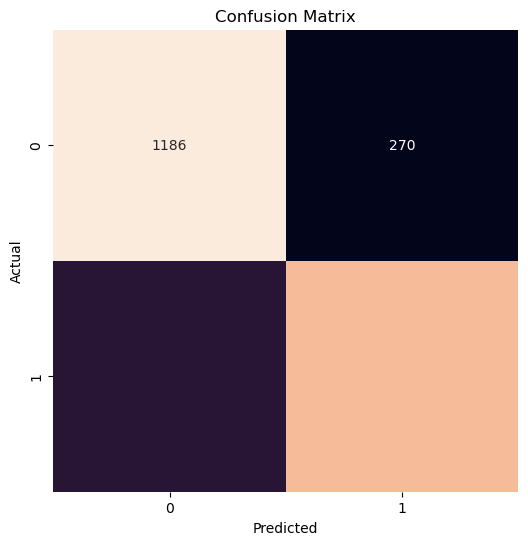

In [320]:
#Plotting the confusion matrix

import seaborn as sns

plt.figure(figsize=(6,6))
sns.heatmap(matrix, fmt="d", cbar=False, xticklabels=True, yticklabels=True, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### Print classification report

In [321]:
from sklearn.metrics import classification_report

matrix = classification_report(Y_test,Y_pred,labels=[1,0])
print(matrix)

              precision    recall  f1-score   support

           1       0.76      0.81      0.79      1456
           0       0.80      0.75      0.77      1442

    accuracy                           0.78      2898
   macro avg       0.78      0.78      0.78      2898
weighted avg       0.78      0.78      0.78      2898



#### Print accuracy score

In [322]:
from sklearn.metrics import accuracy_score

Accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy : ",Accuracy)

Accuracy :  0.7801932367149759


#### Print ROC-AUC score

In [323]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

predict_prob = model.predict_proba(X_test_scaled) 
ROC_AUC_Score = roc_auc_score(Y_test, predict_prob[:,1])
print("AUC_ROC_Score : ",ROC_AUC_Score)

AUC_ROC_Score :  0.8642260348874425


#### Plot ROC-AUC Curve

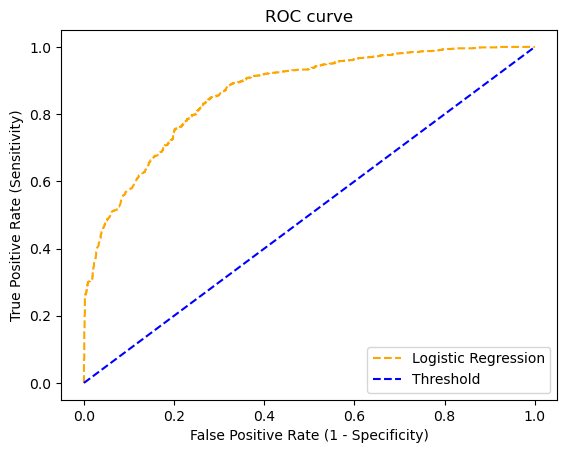

In [324]:
falsePos, truePos, thresh = roc_curve(Y_test, predict_prob[:,1], pos_label=1)

dummy_prob = [0 for x in range(len(Y_test))]

falsePos1, truePos1, thresh1 = roc_curve(Y_test, dummy_prob, pos_label=1)

plt.plot(falsePos, truePos, linestyle="--", color="orange")
plt.plot(falsePos1, truePos1, linestyle="--", color="blue")

plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC curve")

plt.legend(["Logistic Regression","Threshold"])

#### Cross validation

In [325]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_test_scaled, Y_test, cv=5)
print("Cross Validation Score : ",scores)
print("Scores Mean : ",scores.mean())

Cross Validation Score :  [0.76551724 0.76724138 0.77413793 0.76856649 0.78756477]
Scores Mean :  0.7726055625037223


In [326]:
#Summary of results:

print("Accuracy score : ",Accuracy)
print("AUC_ROC score : ",ROC_AUC_Score)
print("Cross validation score : ",scores.mean())

Accuracy score :  0.7801932367149759
AUC_ROC score :  0.8642260348874425
Cross validation score :  0.7726055625037223


## <b>SVM</b>
#### Use default parameters unless mentioned

In [327]:
from sklearn import svm

svm_model = svm.SVC(random_state=42, C=5, gamma='scale', kernel='rbf', probability=True)
svm_model.fit(X_train_scaled, Y_train)

SVC(C=5, probability=True, random_state=42)

In [328]:
Y_pred_svm = svm_model.predict(X_test_scaled)

#### Plot confusion matrix

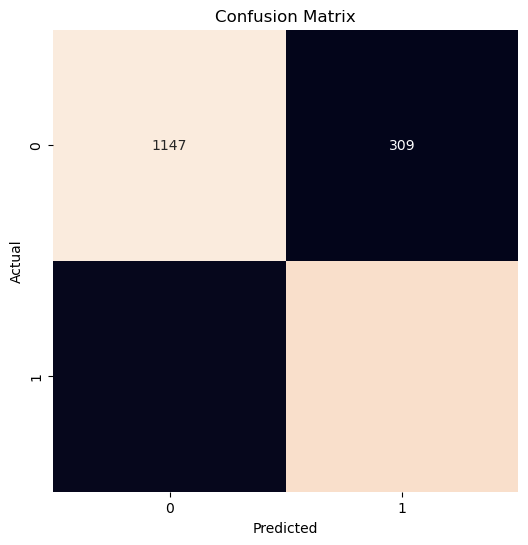

In [329]:
matrix = confusion_matrix(Y_test, Y_pred_svm, labels=[1,0])
plt.figure(figsize=(6,6))
sns.heatmap(matrix, fmt="d", cbar=False, xticklabels=True, yticklabels=True, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#### Print classification report

In [330]:
matrix = classification_report(Y_test,Y_pred_svm,labels=[1,0])
print(matrix)

              precision    recall  f1-score   support

           1       0.78      0.79      0.78      1456
           0       0.78      0.78      0.78      1442

    accuracy                           0.78      2898
   macro avg       0.78      0.78      0.78      2898
weighted avg       0.78      0.78      0.78      2898



#### Print accuracy score

In [331]:
Accuracy = accuracy_score(Y_test, Y_pred_svm)
print("Accuracy : ",Accuracy)

Accuracy :  0.782263630089717


#### Print ROC-AUC score

In [332]:
predict_prob = svm_model.predict_proba(X_test_scaled) 
ROC_AUC_Score = roc_auc_score(Y_test, predict_prob[:,1])
print("AUC_ROC_Score : ",ROC_AUC_Score)

AUC_ROC_Score :  0.8572092998887383


#### Plot ROC-AUC curve

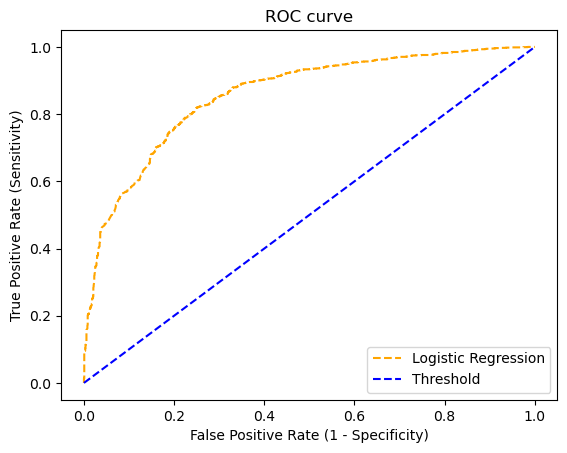

In [333]:
falsePos, truePos, thresh = roc_curve(Y_test, predict_prob[:,1], pos_label=1)

dummy_prob = [0 for x in range(len(Y_test))]

falsePos1, truePos1, thresh1 = roc_curve(Y_test, dummy_prob, pos_label=1)

plt.plot(falsePos, truePos, linestyle="--", color="orange")
plt.plot(falsePos1, truePos1, linestyle="--", color="blue")

plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC curve")

plt.legend(["Logistic Regression","Threshold"])

#### Cross validation

In [334]:
scores = cross_val_score(svm_model, X_test_scaled, Y_test, cv=5)
print("Cross Validation Score : ",scores)
print("Scores Mean : ",scores.mean())

Cross Validation Score :  [0.77758621 0.78275862 0.77931034 0.75993092 0.77202073]
Scores Mean :  0.7743213626347447


In [335]:
#Summary of results:

print("Accuracy score : ",Accuracy)
print("AUC_ROC score : ",ROC_AUC_Score)
print("Cross validation score : ",scores.mean())

Accuracy score :  0.782263630089717
AUC_ROC score :  0.8572092998887383
Cross validation score :  0.7743213626347447
